# Setup

## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import sys
import os
import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import utilities
from utils import setuputil, trainutil, inferutil
from classes.models import SimpleGeluEmbed

# Reload the necessary modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(SimpleGeluEmbed)

# Import the required utils
from utils.setuputil import setup_simple_config, display_simple_config
from utils.trainutil import train_model
from utils.inferutil import infer_one, infer_full

# Import the SimpleGeluEmbedAdd class
from classes.models.SimpleGeluEmbed import SimpleGeluEmbedAdd

## Config Setup

In [2]:
# Define the input configuration for the simple model
setup_config = {
    # Environment and Model Info
    "env": "gcp",                
    "approach": "simple",         
    "model_name": "SimpleGeluEmbedAdd",
    
    # System Configuration
    "device": "cuda:0",
    "threads": 12,
    "seed": 42,
    
    # Data Configuration
    "data_dir": "../../data/farzan",
    "data_ds": "manual",
    
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    
    # Vocabulary Parameters
    "vocab_size": 150000,
    "vocab_space": True,
    "vocab_case": "both",
    
    # Training Parameters
    "batch": 40,
    "lr": 5e-3,
    "mu": 0.25,
    "epochs": 20,
    "patience": 2,
    "save_int": 10,
    "save_dir": '../models/'
}

# Setup the configuration using setuputil and display it
config = setup_simple_config(setup_config)
display_simple_config(config)

# Define local variables from the config dictionary
# System variables
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
spreadsheet_vocab = config["vocab"]
spreadsheet_wvs = config["wvs"]

# Training parameters
batch_size = config["batch"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]


Getting Vocab: 100%|████████████████████████████| 40/40 [00:03<00:00, 12.54it/s]


40(P) = 40(G) + 0(E)
Unique Tokens: 5593
Vocab Size: 5597


Creating Word Embeddings: 100%|██████████| 5597/5597 [00:00<00:00, 72501.40it/s]


Word Embeddings Shape: torch.Size([5597, 50])


Processing files: 100%|█████████████████████████| 40/40 [00:01<00:00, 33.80it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 6438.91it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|█████████████████████████| 5/5 [00:00<00:00, 5799.65it/s]



5(P) = 5(G) + 0(E)

Final configuration:
{
  "env": "gcp",
  "approach": "simple",
  "model_name": "SimpleGeluEmbedAdd",
  "DEVICE": "cuda:0",
  "THREADS": 12,
  "seed": 42,
  "data_dir": "../../data/farzan",
  "data_ds": "manual",
  "train_dir": "../../data/farzan/manual_train",
  "val_dir": "../../data/farzan/manual_val",
  "test_dir": "../../data/farzan/manual_test",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "vocab_size": 5597,
  "vocab_space": true,
  "vocab_case": "both",
  "vocab": "<Vocab Object>",
  "wvs": "<Embedding Tensor>",
  "train_loader": "<Train SpreadsheetDataLoader Object>",
  "val_loader": "<Validation SpreadsheetDataLoader Object>",
  "test_loader": "<Test SpreadsheetDataLoader Object>",
  "batch": 40,
  "lr": 0.005,
  "mu": 0.25,
  "epochs": 20,
  "patience": 2,
  "save_int": 10,
  "save_dir": "../models/",
  "save_name": "gsim42_SimpleGeluEmbedAdd_manual_100x100x32_bSp5k_bsz40lr5e-3ep20pa2"
}


# Model Training

## Define the model

In [3]:
# Define the untrained model and move it to the device
untrained_model = SimpleGeluEmbedAdd(spreadsheet_wvs).to(DEVICE)
print(untrained_model)

SimpleGeluEmbedAdd(
  (_embed): Embedding(5597, 50)
  (_drop): Dropout(p=0.05, inplace=False)
  (_non_linear): GELU(approximate='none')
  (_pred): Linear(in_features=50, out_features=1, bias=True)
)


## Train the Model

In [4]:
trained_model = train_model(
    model=untrained_model,
    train_data=train_loader, 
    val_data=val_loader, 
    DEVICE=DEVICE, 
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config
)

Epoch 0


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 23.318557739257812, Perplexity: 1.0002332127672626
Val Loss: 18.549795150756836, Perplexity: 1.0001855151573165


Epoch 1


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 18.809675216674805, Perplexity: 1.00018811444347
Val Loss: 15.391948699951172, Perplexity: 1.0001539313332115


Epoch 2


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 15.63168716430664, Perplexity: 1.000156329089762
Val Loss: 12.852322578430176, Perplexity: 1.000128531485248


Epoch 3


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 13.110466957092285, Perplexity: 1.0001311132641637
Val Loss: 10.687918663024902, Perplexity: 1.000106884898414


Epoch 4


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 10.963469505310059, Perplexity: 1.000109640705156
Val Loss: 8.784438133239746, Perplexity: 1.000087848239763


Epoch 5


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]


Train Loss: 9.112813949584961, Perplexity: 1.000091132291791
Val Loss: 7.075927257537842, Perplexity: 1.0000707617760718


Epoch 6


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 7.514081001281738, Perplexity: 1.000075143633154
Val Loss: 5.525445938110352, Perplexity: 1.0000552559859368


Epoch 7


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 6.003488063812256, Perplexity: 1.0000600366827677
Val Loss: 4.123777866363525, Perplexity: 1.0000412386289526


Epoch 8


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 4.732602596282959, Perplexity: 1.0000473271458568
Val Loss: 2.905421733856201, Perplexity: 1.0000290546394164


Epoch 9


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 3.6612749099731445, Perplexity: 1.0000366134193546
Val Loss: 1.9375724792480469, Perplexity: 1.0000193759125031

Model Saved

Epoch 10


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 2.7789061069488525, Perplexity: 1.000027789447189
Val Loss: 1.2371156215667725, Perplexity: 1.0000123712327387


Epoch 11


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.63s/it]


Train Loss: 2.081183671951294, Perplexity: 1.0000208120532872
Val Loss: 0.7781156897544861, Perplexity: 1.0000077811871708


Epoch 12


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 1.5616717338562012, Perplexity: 1.0000156168392802
Val Loss: 0.5187563300132751, Perplexity: 1.0000051875767555


Epoch 13


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.64s/it]


Train Loss: 1.2230260372161865, Perplexity: 1.0000122303351622
Val Loss: 0.3933829665184021, Perplexity: 1.0000039338374027


Epoch 14


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.61s/it]


Train Loss: 0.9685271382331848, Perplexity: 1.0000096853182847
Val Loss: 0.34083250164985657, Perplexity: 1.000003408330825


Epoch 15


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.776139497756958, Perplexity: 1.0000077614250973
Val Loss: 0.32022666931152344, Perplexity: 1.0000032022718204


Epoch 16


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.59s/it]


Train Loss: 0.6612909436225891, Perplexity: 1.0000066129313017
Val Loss: 0.3141045570373535, Perplexity: 1.0000031410505035


Epoch 17


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.60s/it]


Train Loss: 0.5897329449653625, Perplexity: 1.0000058973468389
Val Loss: 0.31875649094581604, Perplexity: 1.0000031875699897


Epoch 18


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.58s/it]


Train Loss: 0.5328704714775085, Perplexity: 1.0000053287189123
Val Loss: 0.307440847158432, Perplexity: 1.0000030744131976


Epoch 19


Validation Processing: 100%|██████████████████████| 1/1 [00:01<00:00,  1.62s/it]

Train Loss: 0.4951442778110504, Perplexity: 1.0000049514550364
Val Loss: 0.3247106373310089, Perplexity: 1.0000032471116451

Model Saved


TRAINING DONE at epoch 19, best epoch 18
Train Loss = 0.5328704714775085, Perplexity = 1.0000053287189123
Val Loss = 0.307440847158432, Perplexity = 1.0000030744131976


# Evaluation

In [7]:
# Define params for evaluation
thresh = 0.98
loc = 0
cond = '>'
disp_max=True

## Single Example


Filename: ../../data/farzan/manual_train/Harassment-Bullying-on-basis-of-race_reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,4): 0.893938
(5,22): 0.937503
(4,11): 0.950388
(5,18): 0.951058
(4,5): 0.954249
(3,3): 0.960866
(5,3): 0.961558
(3,1): 0.973552
(4,3): 0.983167
(4,15): 0.988464
(3,23): 0.989970
(3,2): 0.990702
(3,21): 0.991459
(4,9): 0.995062
(6,1): 0.995094
(4,7): 0.996420
(3,24): 0.997027
(4,13): 0.997147
(3,17): 0.998932
(3,19): 0.999612
(1,1): 0.999682

NB to B ratio: Predicted = 9891:109 | Actual = 9930:70
Accuracy: 98.81% | Precision: 27.52% | Recall: 42.86% | F1-Score: 0.34



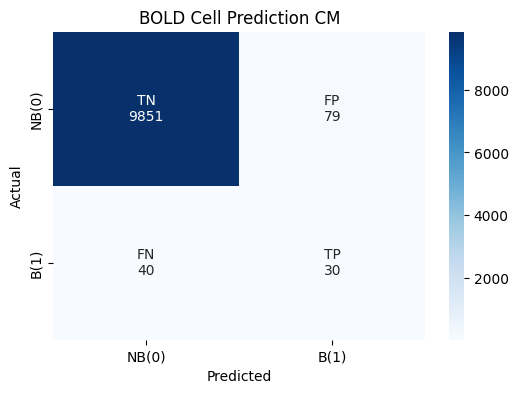


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Filename: ../../data/farzan/manual_val/advanced-placement-mathematics-enrollment.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(5,4): 0.893938
(5,18): 0.937503
(4,11): 0.950388
(4,5): 0.954249
(3,3): 0.960866
(5,3): 0.961558
(3,1): 0.973552
(4,3): 0.983167
(4,15): 0.988464
(3,21): 0.989970
(3,2): 0.990702
(3,19): 0.991459
(4,9): 0.995062
(4,7): 0.996420
(3,22): 0.997027
(4,13): 0.997147
(1,1): 0.998350
(3,17): 0.999391

NB to B ratio: Predicted = 9876:124 | Actual = 9937:63
Accuracy: 98.63% | Precision: 20.16% | Recall: 39.68% | F1-Score: 0.27



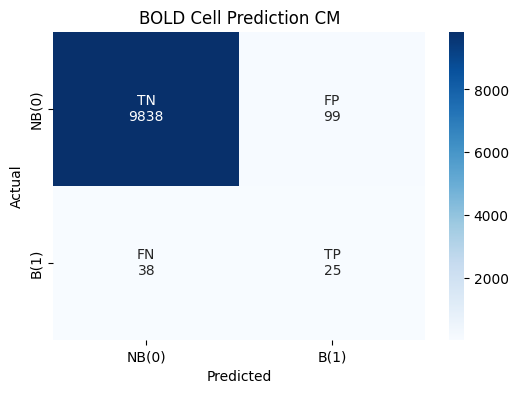


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
4,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



Filename: ../../data/farzan/manual_test/dlportfolio-by-school-type.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(9,1): 0.944409
(19,0): 0.945083
(7,1): 0.949380
(4,10): 0.952470
(6,0): 0.952554
(4,8): 0.955397
(6,1): 0.958064
(4,2): 0.959059
(11,0): 0.959384
(7,0): 0.960185
(15,0): 0.960772
(8,1): 0.963341
(4,4): 0.968667
(4,6): 0.980275
(5,0): 0.986407
(5,3): 0.996918
(0,0): 0.998513
(5,2): 0.999910
(5,4): 0.999941

NB to B ratio: Predicted = 9937:63 | Actual = 9936:64
Accuracy: 99.25% | Precision: 41.27% | Recall: 40.62% | F1-Score: 0.41



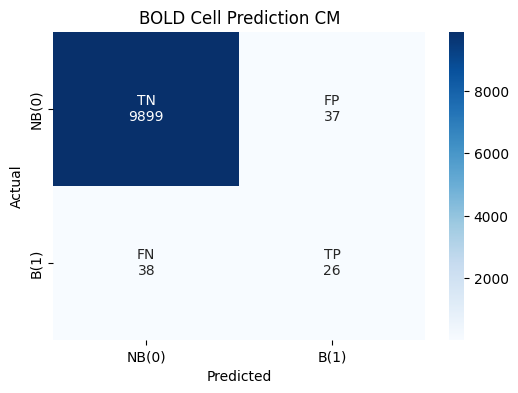


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,1,1,0,0,0,0
5,1,1,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1,1
23,1,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0


In [8]:
# Check with single example
infer_one(trained_model, train_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, val_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)
infer_one(trained_model, test_loader, loc=loc, threshold=thresh, condition=cond, disp_max=disp_max, device=DEVICE)

## All Examples

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  2.00s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 395840:4160 | Actual = 396714:3286
Accuracy: 98.88% | Precision: 35.53% | Recall: 44.98% | F1-Score: 0.40



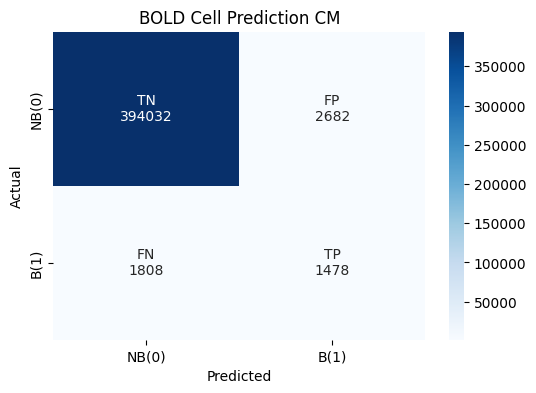

In [9]:
# Evaluate the model on all train files
infer_full(trained_model, train_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49472:528 | Actual = 49602:398
Accuracy: 98.85% | Precision: 33.33% | Recall: 44.22% | F1-Score: 0.38



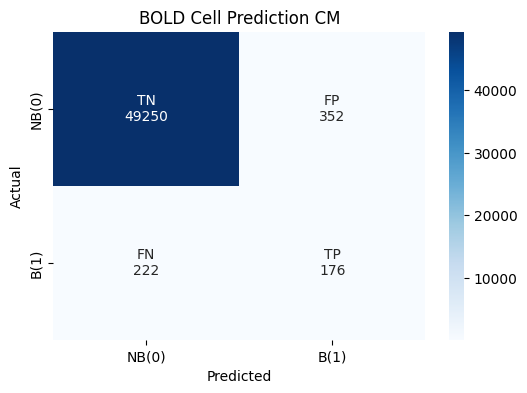

In [10]:
# All val files
infer_full(trained_model, val_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)

Batch Inference: 100%|████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49525:475 | Actual = 49606:394
Accuracy: 98.89% | Precision: 33.26% | Recall: 40.10% | F1-Score: 0.36



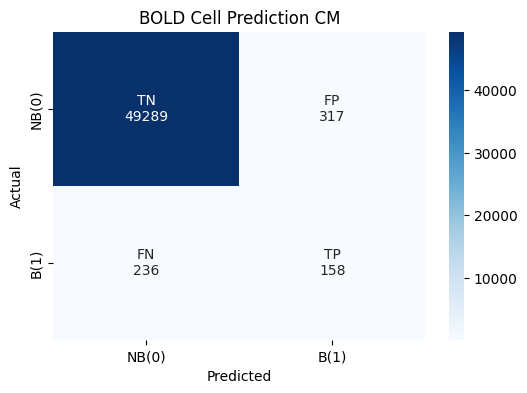

In [11]:
# All test files
infer_full(trained_model, test_loader, batch_size=batch_size, threshold=thresh, device=DEVICE)